
**Roll no : DA24C021**

**Name : Venkatesh Duraiarasan**

# DA5401 Assignment 4
Consider a DummyBinaryClassifier that returns a random label in {True, False} for any test input that’s fed to it.



This classifier does not require any training! Hope, that was already obvious to you.

Implement this DummyBinaryClassifier as a Python class by extending the BaseEstimator class of sklearn, so that you have mandatory methods such as fit(X, y) and predict(X) are implemented.

As your guess, the fit() method would be a dummy ‘pass’, but the predict() method would return True or False randomly.


In [9]:
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd
import os
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

In [10]:
seed = 42

class DummyBinaryCalssifierDefault(BaseEstimator):

  def __init__(self):
    pass

  def fit(self,X,y):
    self.is_fitted_=True
    return self

  def predict(self, X):
    # random number generator
    rg = np.random.default_rng(seed)
    random_labels = rg.random((X.shape[0],1))

    # return random label
    return np.where(random_labels>0.5,True,False)

data = np.random.rand(1000)
prediction = DummyBinaryCalssifierDefault().predict(data)
# calculate prior probability p
p = np.count_nonzero(prediction == True)/len(prediction)
print(f'================================================================')
print(f'prior probaility (default random number generator): {round(p,2)}')


prior probaility (default random number generator): 0.5


# Task 1 [10 points]
## Task Details
Let’s measure the label distribution (prior probability) of the predictions made by DummyBinaryClassifier.

As you guessed, the label distribution is dependent on the random generator, which typically could be one of {Normal, Bernoulli or Uniform} distributions.

As a part of Task 1, you are to implement all the above three generators (using libraries). You may choose the generator type while instantiating the classifier object.

Moreover, Bernoulli requires ‘p’ as a parameter representing the probability of “True”. Likewise, the normal and uniform distributions require a threshold to convert the discrete samples into Booleans.

You may assume that the threshold is in [0,1] range. Typically, you will instantiate as DummyBinaryClassifier(method=’bernoulli’, p=0.5). The expectation is a line-plot with the x-axis represent the p in [0,1] in steps of 0.1 and the y-axis representing the Pr(True). Your plot will have 3 such lines representing 3 different random generators.


In [11]:
class DummyBinaryCalssifier(BaseEstimator):

  def __init__(self, method="uniform", p=None):
    # method - any value in  {Normal, Bernoulli or Uniform}
    # p - threshold, value in  [0,1]
    self.method = method
    self.p =p

  def fit(self,X,y):
    self.is_fitted_=True
    return self

  def predict(self, X):

    # default random number generator
    # rng = np.random.default_rng(seed)
    seed = 13102023
    # output shape
    y_dim = (X.shape[0],1)

    # choose generator as per argument 'method'
    if self.method == "bernoulli":
      rng = np.random.default_rng(seed)
      random_labels = rng.binomial(1, self.p, size= y_dim)
      return np.squeeze(random_labels==True)
    elif self.method == "guassian":
      rng = np.random.default_rng(seed)
      random_labels = rng.normal(loc=0.5, scale=1/3,size=y_dim)
      # random_labels =(0.5 + np.random.randn(len(X))/3) < self.p
      return np.squeeze(random_labels<p)
    elif self.method == "uniform":
      rng = np.random.default_rng(seed)
      random_labels = rng.random(y_dim)
      return np.squeeze(random_labels<p)

data = np.random.rand(1000)
# default random number generator
p=0.5
prediction = DummyBinaryCalssifier(method="bernoulli", p=p).predict(data)
# calculate prior probability p
p_hat = np.count_nonzero(prediction == True)/len(prediction)
print(f'prior probaility (bernoulli random number generator)when p={p} : p_hat=  {round(p_hat,2)}')

prediction = DummyBinaryCalssifier(method="guassian", p=p).predict(data)
# calculate prior probability p
p_hat = np.count_nonzero(prediction == True)/len(prediction)
print(f'prior probaility (guassian random number generator) when p={p} : p_hat=  {round(p_hat,2)}')

prediction = DummyBinaryCalssifier(method="uniform", p=p).predict(data)
# calculate prior probability p
p_hat = np.count_nonzero(prediction == True)/len(prediction)
print(f'prior probaility (uniform random number generator)  when p={p} : p_hat=  {round(p_hat,2)}')


prior probaility (bernoulli random number generator)when p=0.5 : p_hat=  0.48
prior probaility (guassian random number generator) when p=0.5 : p_hat=  0.48
prior probaility (uniform random number generator)  when p=0.5 : p_hat=  0.52


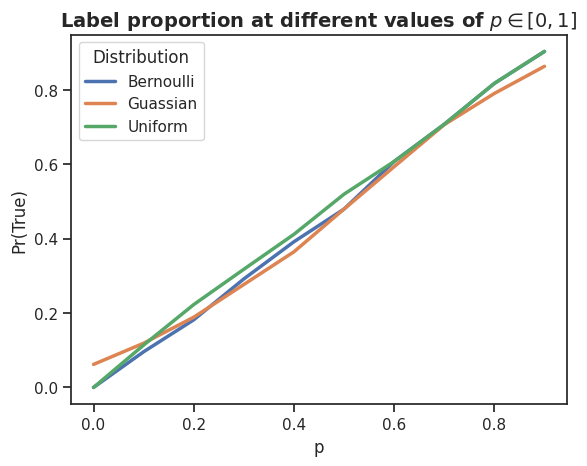

In [12]:
X = np.random.rand(1000)
res_data = []

for p in np.arange(0., 1., 0.1):
    # dummy binary classifier with bernouli random sample generator
    y = DummyBinaryCalssifier(p=p, method='bernoulli').predict(X)
    # compute priors
    prior_1 = np.count_nonzero(y == True)/len(y)
    res_data.append([p,"Bernoulli",prior_1])

    # dummy binary classifier with gaussian random sample generator
    y = DummyBinaryCalssifier(p=p, method='guassian').predict(X)
    # compute priors
    prior_2 = np.count_nonzero(y == True)/len(y)
    res_data.append([p,"Guassian",prior_2])

    # dummy binary classifier with uniform random sample generator
    y = DummyBinaryCalssifier(p=p, method='uniform').predict(X)
    # compute priors
    prior_3 = np.count_nonzero(y == True)/len(y)
    res_data.append([p,"Uniform",prior_3])


plt_data = pd.DataFrame(res_data, columns=["p", "Distribution", "Pr(True)"])

ax = sns.lineplot(data=plt_data,linewidth=2.5, x="p", y="Pr(True)", hue="Distribution",style="Distribution", dashes=False,)
ax.set_title('Label proportion at different values of $p\in[0,1]$', weight='bold').set_fontsize('14')

# Task 2 [20 points]
Consider the IRIS dataset, but convert the 3-class dataset into a binary class dataset by choosing the majority class as say class True and the remaining two classes as class False. Now, using the bernoulli version of the DummyBinaryClassifier, make the prediction of binary IRIS dataset.
1. Report the label prior of the binary IRIS dataset.
2. Compute the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in
steps of 0.1 and plot the P, R, C as line plots.
3. Using the P & R values, plot PRC.
4. Using TPR and FPR, plot RoC.
5. Report the AUPRC and AURoC.

## Load the data

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = load_iris(as_frame=True)
plants = pd.DataFrame(data=np.c_[iris_df['data'], iris_df['target']],
                  columns= iris_df['feature_names'] + ['target'])\
                  .astype({'target': int}) \
                  .assign(species=lambda x: x['target']\
                  .map(dict(enumerate(iris_df['target_names']))))

## Lets find the prior probability for each class

In [14]:
# Report the label prior of the binary IRIS dataset.
c = Counter(plants["species"])
print("species count :\n", c)
label_prior=props = {i[0]:i[1]/len(plants) for i in c.items()}
print("label prior :\n", label_prior)

species count :
 Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})
label prior :
 {'setosa': 0.3333333333333333, 'versicolor': 0.3333333333333333, 'virginica': 0.3333333333333333}


## lets look at the distribution of three different species

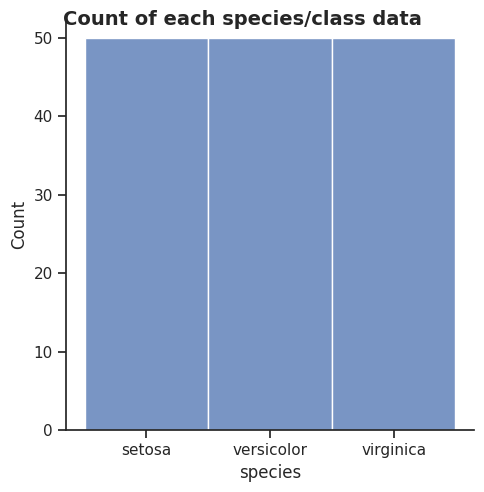

In [15]:
ax = sns.displot(plants, x="species")
ax.fig.suptitle('Count of each species/class data', weight='bold').set_fontsize('14')

## From above chart we can see each class in Iris dataset has equal number of observations

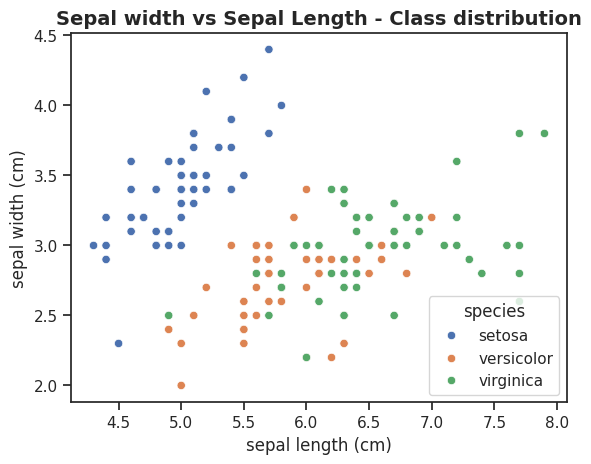

In [28]:
# create scatter plot for samples from each class
ax = sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue='species', data=plants,)
ax.set_title('Sepal width vs Sepal Length - Class distribution', weight='bold').set_fontsize('14')

## Scatter plot reveals that Setosa species can be seperable, lets choose Setosa as the majority class

In [17]:
from collections import Counter
# all three species has same data count
# lets choose the Iris-setosa as the majority class
# and set a column Setosa
plants["setosa"] = (plants['species'])=="setosa"

## create scatter plot for samples after making setosa as the majority class

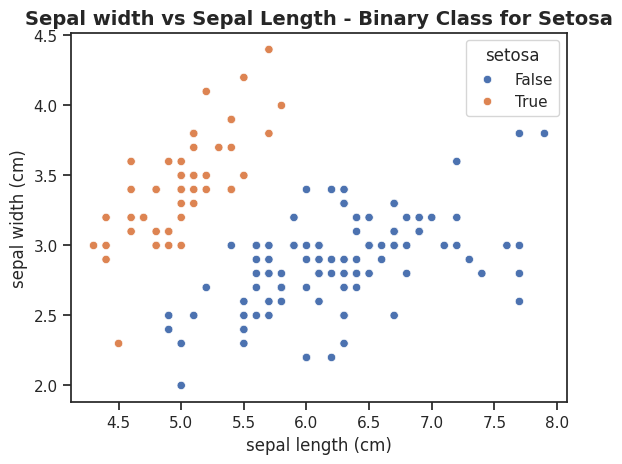

In [30]:
ax = sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue='setosa', data=plants)
ax.set_title('Sepal width vs Sepal Length - Binary Class for Setosa', weight='bold').set_fontsize('14')

## Now, using the bernoulli version of the DummyBinaryClassifier, make the prediction of binary IRIS dataset.

In [19]:

y = np.squeeze(np.c_[plants["setosa"]])
y_pred = DummyBinaryCalssifier(p=label_prior['setosa'], method='bernoulli').predict(plants)


## Compute the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in steps of 0.1


In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score, precision_score, recall_score


thresholds = np.arange(0.0, 1.1, 0.1)
precision_scores = []
recall_scores = []
f1_scores = []

for thresh in thresholds:
  y_pred_thresh = DummyBinaryCalssifier(p=thresh, method='bernoulli').predict(plants.iloc[:,:-3])
  precision = precision_score(y, y_pred_thresh)
  recall = recall_score(y, y_pred_thresh)

  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1_score(y, y_pred_thresh))


precision, recall, _ = precision_recall_curve(y, y_pred)
print(precision, recall)

fpr, tpr, _ = roc_curve(y, y_pred)
auprc = auc(recall, precision)
auroc = auc(fpr, tpr)



[0.33333333 0.32075472 1.        ] [1.   0.34 0.  ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plot Precision, Recall, and F1 score vs Threshold

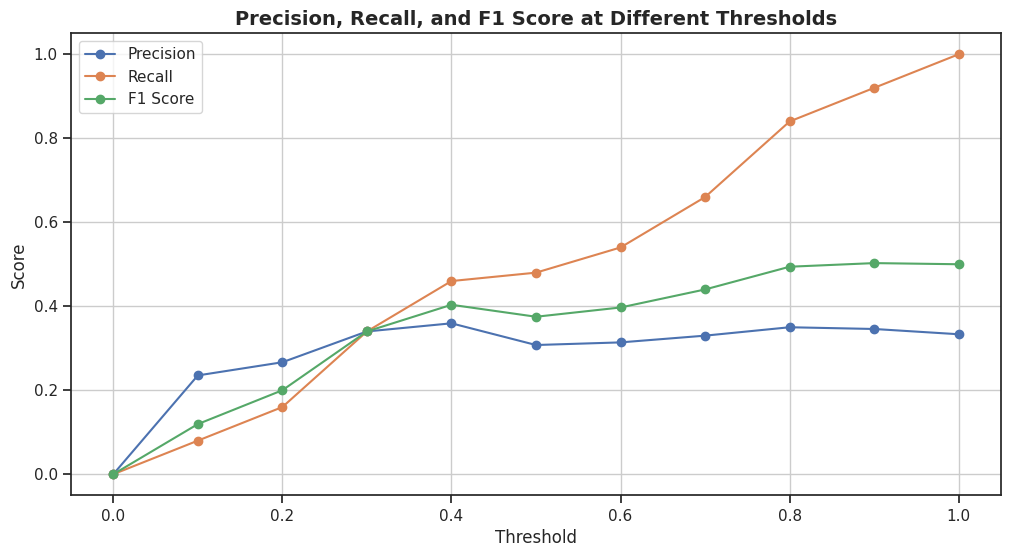

In [31]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score at Different Thresholds', weight='bold').set_fontsize('14')
plt.legend()
plt.grid(True)
plt.show()


## Using the P & R values, plot PRC.

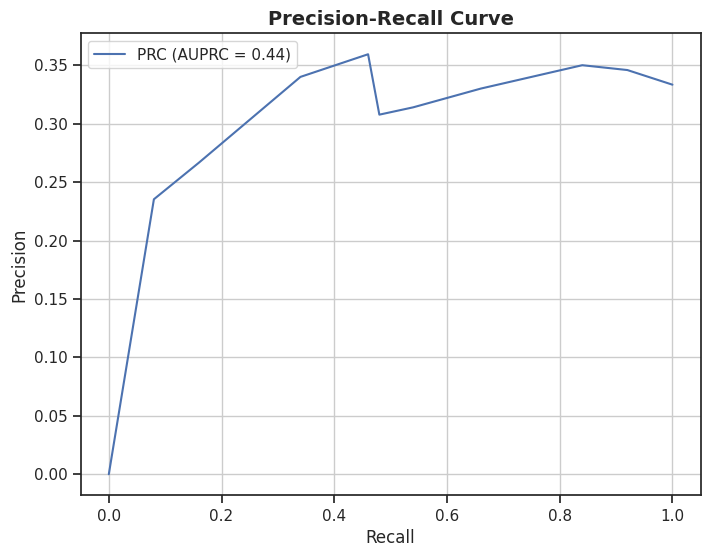

In [32]:

# Plot PRC
plt.figure(figsize=(8, 6))
plt.plot(recall_scores, precision_scores, label=f'PRC (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve',weight='bold').set_fontsize('14')
plt.legend()
plt.grid(True)
plt.show()


## Here we can see area under Precision Recall curve is only 0.44

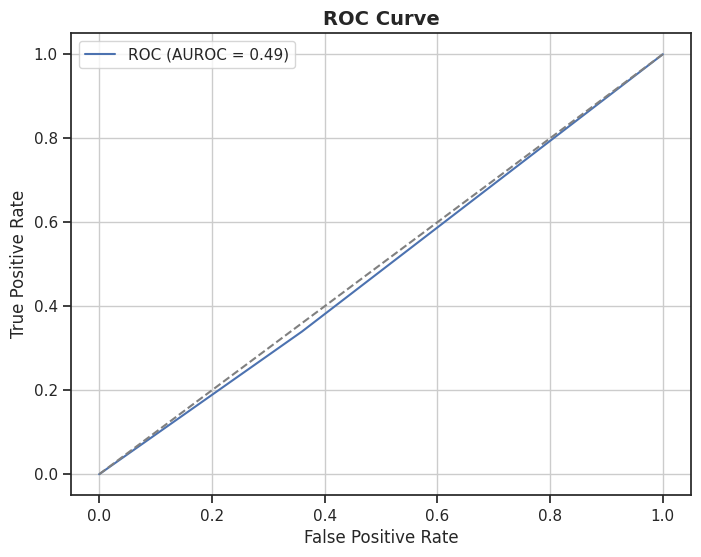

In [33]:
# Using TPR and FPR, plot RoC.

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUROC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',weight='bold').set_fontsize('14')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Report the AUPRC and AURoC.
print(f"AUPRC: {auprc:.2f}, AUROC: {auroc:.2f}")

AUPRC: 0.44, AUROC: 0.49


## area under ROC is only 0.49

# Task 3
Generate the visualization of the decision boundaries induced by DummyBinaryClassifier at different values of p in [0, 1] in steps of 0.25 for all the three random generators.


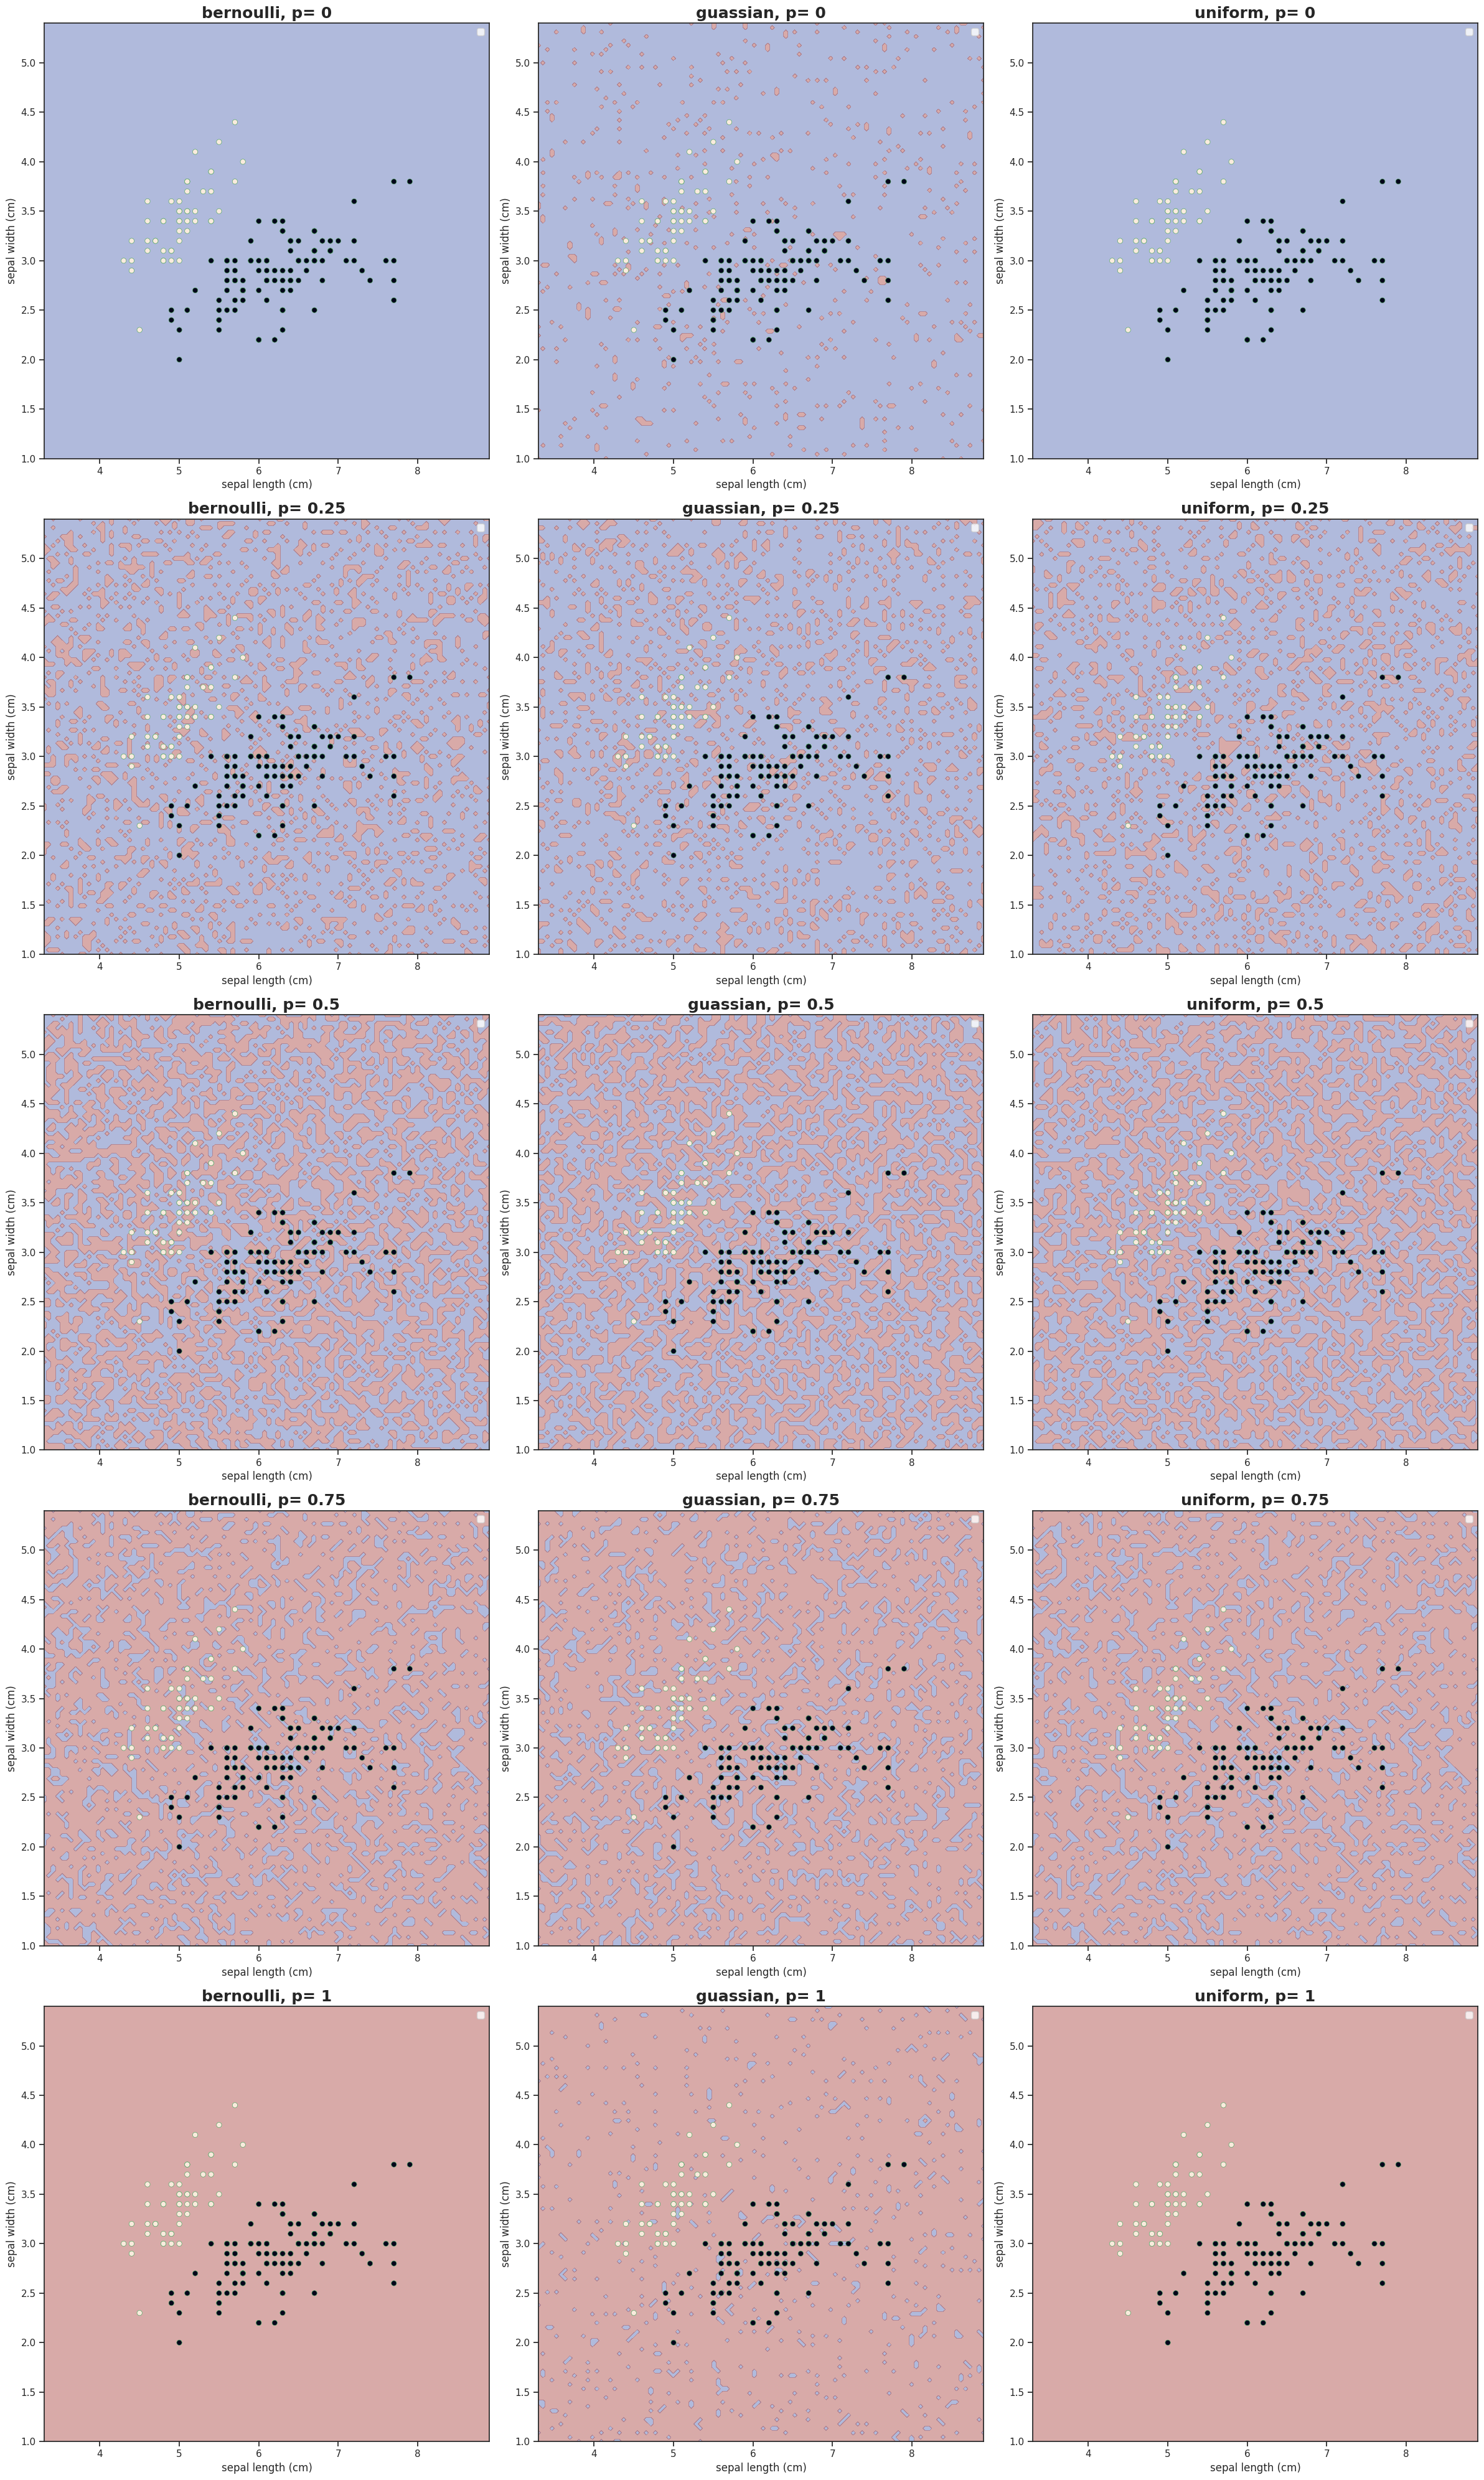

In [25]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

X = plants.iloc[:,0:2]
# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(24, 8*5))

# Create four displays with different colormaps
dist_list = ['bernoulli', 'guassian', 'uniform']
p_list = [0, 0.25, 0.5, 0.75, 1]

for j, p in enumerate(p_list):
  for i, dist in enumerate(dist_list):
    classifier = DummyBinaryCalssifier(p=p, method=dist).fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X, response_method="predict",
        xlabel=plants.columns[0], ylabel=plants.columns[1],
        alpha=0.5, cmap='twilight' ,
        ax=axes[j,i]
    )
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1],  c=plants.setosa, edgecolor="g", ax=axes[j,i])
    axes[j,i].set_title(f"{dist}, p= {p}", weight='bold').set_fontsize('18')
    axes[j,i].legend()

plt.tight_layout()
plt.show()